In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#change pyplot font size
plt.rcParams['font.size'] = 20

#change figsize
plt.rcParams['figure.figsize'] = (10,5)


In [2]:
def boxplot(variables, variable_names):
    plt.boxplot(variables)
    plt.xlabel("Variables")
    plt.ylabel("Values")
    plt.xticks(range(1, len(variable_names)+1), variable_names, rotation=45)


In [3]:
#loading data
dataset = pd.read_csv('europe.csv')

#le sacamos el nombre de los paises
countries = dataset.iloc[:,0]
variable_names = dataset.iloc[:,1:].columns
variables = dataset.iloc[:, 1:].values

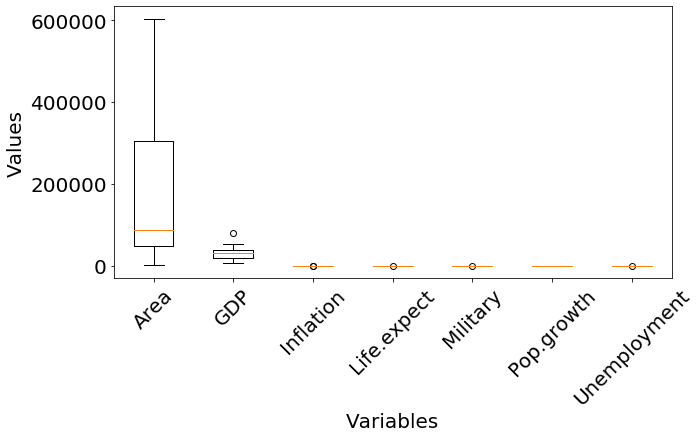

In [4]:
#ploteamos variables 
plt.figure("Raw variables")
boxplot(variables, variable_names)
plt.show()

In [5]:
#normalizamos los datos
standardized = StandardScaler().fit_transform(variables)


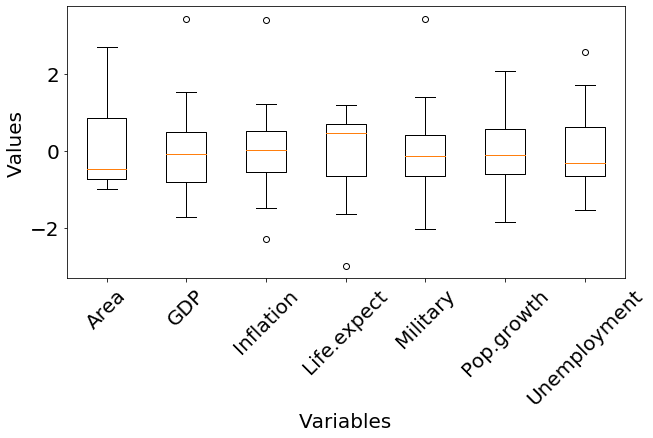

In [6]:
plt.figure("Standardized variables")
boxplot(standardized, variable_names)

plt.show()

In [7]:
pca = PCA()
components = pca.fit_transform(standardized)
axis = pca.components_
variance_ratio = pca.explained_variance_ratio_


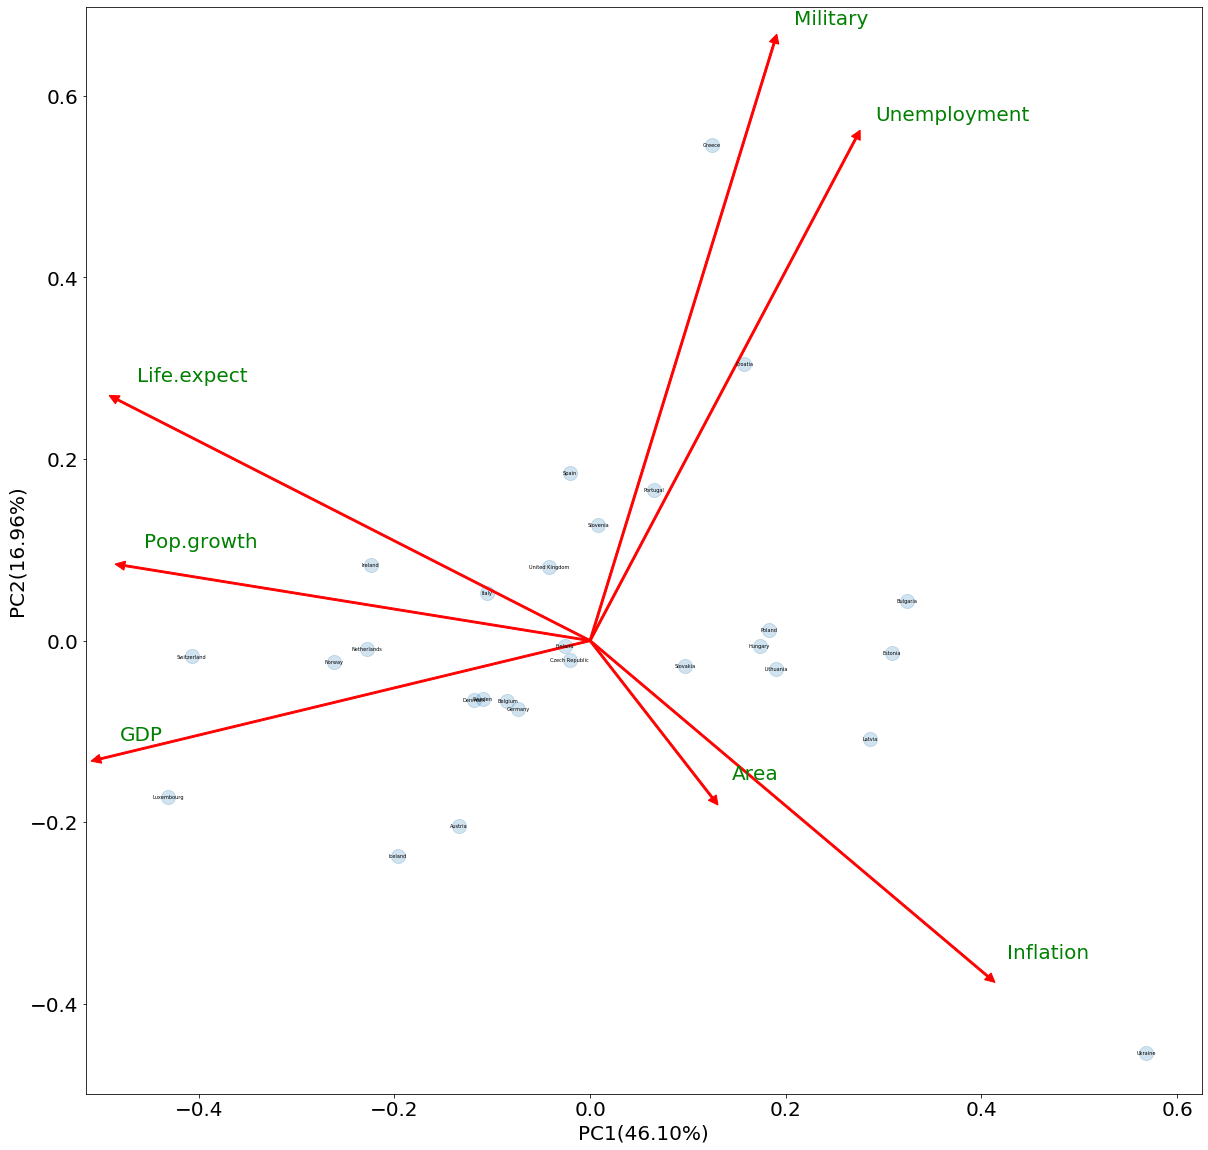

In [81]:
plt.figure("scatter", figsize=(20, 20))

x = components[:, 0]
y = components[:, 1]

scale_x = 1/(np.max(x) - np.min(x))
scale_y = 1/(np.max(y) - np.min(y))

scaled_x = x * scale_x
scaled_y = y * scale_y

text_offset = 0.02

for i in range(len(axis)):
    axis_x = axis[0][i]
    axis_y = axis[1][i]
    plt.arrow(0, 0, axis_x, axis_y, color='r', width=0.002,
              head_width=0.01, head_length=0.01)
    plt.text(axis_x+text_offset, axis_y+text_offset,
             variable_names[i], color='g',)

for i in range(len(countries)):
    plt.annotate(countries[i], (scaled_x[i], scaled_y[i]), fontsize=5, ha="center", va="center", color="black")

# , c=dataset["Unemployment"], cmap='coolwarm')
s = plt.scatter(scaled_x, scaled_y, s=200, alpha=0.2)


# plt.colorbar(s)

low_x = np.min(np.concatenate((scaled_x*1.1, axis[0, :]-0.01)))

upper_x = np.max(np.concatenate((scaled_x*1.1, axis[0, :]+0.01)))


low_y = np.min(np.concatenate((scaled_y*1.1, axis[1, :] - 0.01)))

upper_y = np.max(np.concatenate((scaled_y*1.1, axis[1, :]+2*text_offset)))


plt.xlim(low_x*1.01, upper_x)
plt.ylim(low_y, upper_y)

plt.xlabel("PC1({:.2f}%)".format(variance_ratio[0]*100))
plt.ylabel("PC2({:.2f}%)".format(variance_ratio[1]*100))

plt.savefig("biplot.svg")

plt.show()

